In [1062]:
# 原始链接： https://www.kaggle.com/code/abhayparashar31/titanic-complete-analysis-prediction/notebook#Model-Training

In [ ]:
# !pip install xxx

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

## 加载数据集

在机器学习中，数据集是指用于训练、验证和测试机器学习模型的数据的集合。数据集通常包含两个部分：特征（输入数据）和标签（输出数据）。下面我会详细介绍机器学习中常见的几种数据集：  

**训练数据集（Training Dataset）：**  
训练数据集是用于训练机器学习模型的数据集。  
包含了特征和对应的标签。  
模型通过学习训练数据集中的模式、关系和规律来进行训练。  
**验证数据集（Validation Dataset）：**  
验证数据集用于评估模型的性能和调优超参数。  
通常从训练数据集中分出一部分作为验证数据集。  
模型在验证数据集上进行评估，以便及时发现模型是否出现过拟合或欠拟合，并选择最佳的超参数设置。  
**测试数据集（Test Dataset）：**  
测试数据集用于最终评估模型的性能和泛化能力。  
保持未见过的数据，用于评估模型在真实世界数据上的表现。  
在模型训练和超参数调优完成后，使用测试数据集进行最终性能评估。  
**无标签数据集（Unlabeled Dataset）：**  
无标签数据集只包含特征信息，缺少对应的标签信息。  

In [4]:
df_labeled = pd.read_csv (r'DataSet\LabeledData.csv')
df_unLabeled = pd.read_csv(r'DataSet\UnlabeledData.csv')

In [5]:
df_labeled.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_unLabeled.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
## Checking for  the number of rows and columns  in the dataset
# 检查数据集中的行数和列数
print(f"Number of rows :{df_labeled.shape[0]} \nNumber of columns:{df_labeled.shape[1]}")

Number of rows :891 
Number of columns:12


## EDA

什么是EDA？ 
在kaggle社区经常会遇到EDA这个词。EDA的全称是Exploratory Data Analysis，是一种探索式的数据分析，  

探索性数据分析（EDA）是由数据科学家用来分析和调查数据集，并总结其主要特征，通常采用数据可视化方法。  
它有助于确定如何最好地操作数据源以获得你所需要的答案，使数据科学家更容易发现模式，发现异常，测试一个假设，或检查假设。  

EDA的主要目的是目的是为了理解你的数据、做出任何假设之前帮助观察数据。它可以帮助识别明显的错误，以及更好地理解数据中的模式，检测异常值或异常事件，找到变量间的有趣关系。  

通过总结数据的主要特征、绘制图表从而更形象生动的理解。  
常用的作图方法有：直方图（Histograms），箱形图（Box plot），散点图（Scatter plot）等等。  

为什么要做探索性数据分析？

对数据集更深的理解（分布、缺失等统计信息）  
获得高质量的数据集（异常值、缺失值的基本处理）  
机器学习模型、实证假设构建的思路（灵感）  

In [10]:
# 查看数据集的列
df_labeled.columns
# 查看各个元素和Survived的关系

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

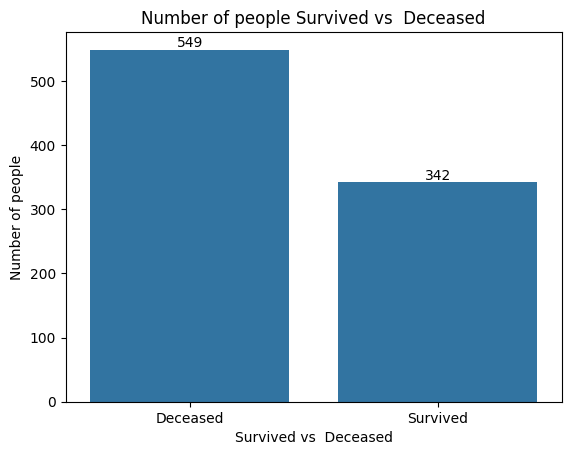

In [11]:
# Survived
ax = sns.countplot(data=df_labeled, x = 'Survived');  # countplot是seaborn库中分类图的一种，作用是使用条形显示每个分箱器中的观察计数
ax.bar_label(ax.containers[0]) # 在柱状图上显示y的数值，取出AxesSubplot对象的containers属性，得到container对象的迭代器，遍历其或单独取出container对象传给plt.bar_label

plt.title("Number of people Survived vs  Deceased")
plt.xlabel("Survived vs  Deceased")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Deceased','Survived'])
plt.show();

In [14]:
# Age
df_labeled.Age.mean()

np.float64(29.544332210998878)

In [15]:
# 将Age为NAN的单元，使用mean平均值填充
# df_labeled['Age']
df_labeled['Age'] = df_labeled['Age'].fillna(df_labeled['Age'].mean()) # 使用mean值填充Age的NAN值
df_labeled['Age'] = df_labeled['Age'].astype(int)
df_labeled['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 891, dtype: int64

In [16]:
# 将df_labeled进行拷贝
temp = df_labeled.copy()

In [17]:
# 根据不同年龄段，打上不同的标签
temp['Age'] = pd.cut(temp['Age'], bins = [0,12,20,40,120],labels=['Children','Teenage','Adult','Elder'])

[Text(0, 0, '62'), Text(0, 0, '111'), Text(0, 0, '563'), Text(0, 0, '148')]

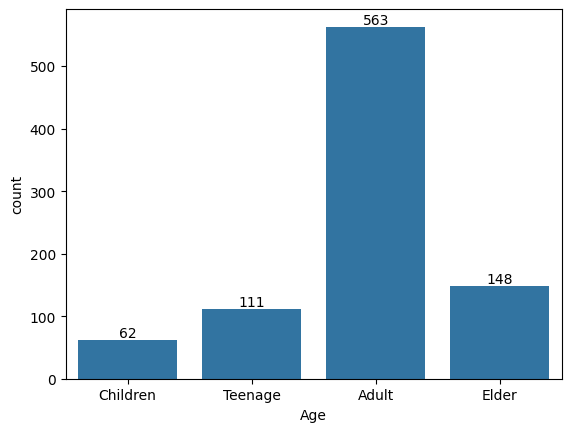

In [18]:
# 根据年龄段进行数据可视化
ax = sns.countplot(data = temp, x='Age')
ax.bar_label(ax.containers[0])

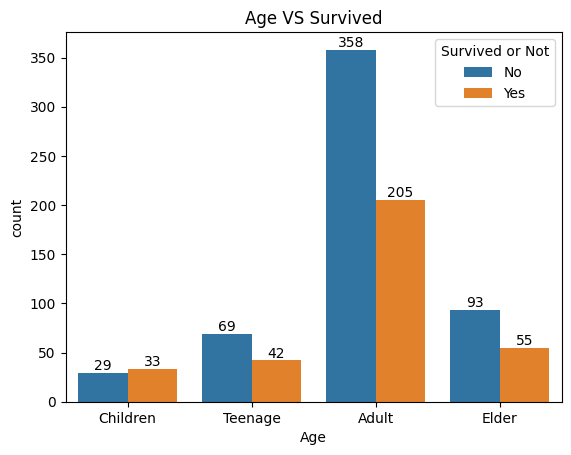

In [19]:
# 统计每个年龄段surived和not surived 的人数
ax=sns.countplot(data = temp, x = 'Age',hue= 'Survived')  
# data：df或array或array列表，用于绘图的数据集，x或y缺失时，data参数为数据集，同时x或y不可缺少，必须要有其中一个
# x： x轴上的条形图，以x标签划分统计个数
# hue：在x或y标签划分的同时，再以hue标签划分统计个数
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
plt.legend(title='Survived or Not',loc='upper right',labels=['No','Yes']);
plt.title('Age VS Survived')
plt.show()

In [1077]:
# 票价fare
# 票价的平均值
temp['Fare'].mean()

32.204207968574636

<Axes: >

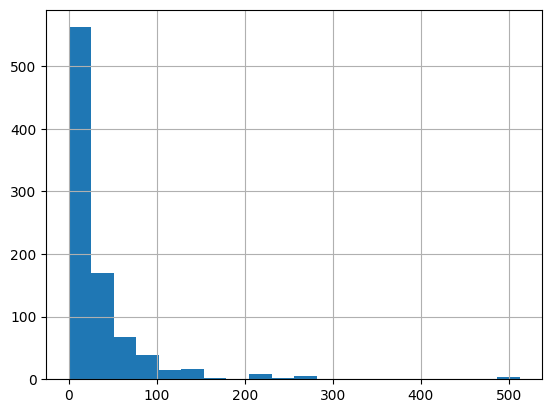

In [1078]:
temp['Fare'].hist(bins=20)  # Pandas的画图函数：df.hist()

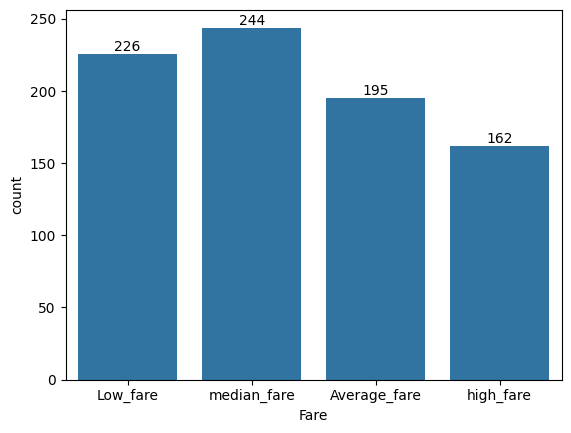

In [1079]:
# 根据票价，分为四个分段 
temp['Fare'] = pd.cut(temp['Fare'], bins=[0,8,16,32,110], labels=['Low_fare','median_fare','Average_fare','high_fare'])
ax = sns.countplot(data=temp, x='Fare')
ax.bar_label(ax.containers[0]);

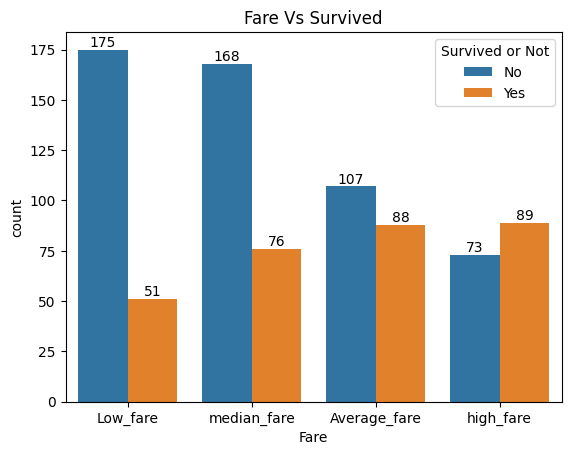

In [1080]:
# 各个票价分段，存活和死亡的人数
ax = sns.countplot(data=temp, x='Fare',hue='Survived')
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
plt.legend(title='Survived or Not', loc='upper right', labels=['No', 'Yes']);
plt.title('Fare Vs Survived')
plt.show();

In [1081]:
# Cabin座位信息
nullCabin = temp.Cabin.isna().sum()
nullCabin

687

In [1082]:
temp['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [1083]:
# 座位信息缺失严重
str(round(nullCabin/(len(temp))*100,2))+"% Null Values"
# 有这么多空值，所以最好放弃它。

'77.1% Null Values'

In [1084]:
# 仓位等级 Pclass : Passenger Class
temp.Pclass.unique()

array([3, 1, 2], dtype=int64)

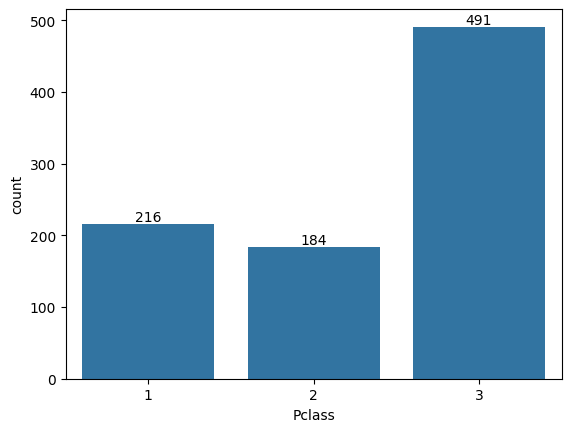

In [1085]:
ax = sns.countplot(data=temp,x='Pclass');
ax.bar_label(ax.containers[0]);

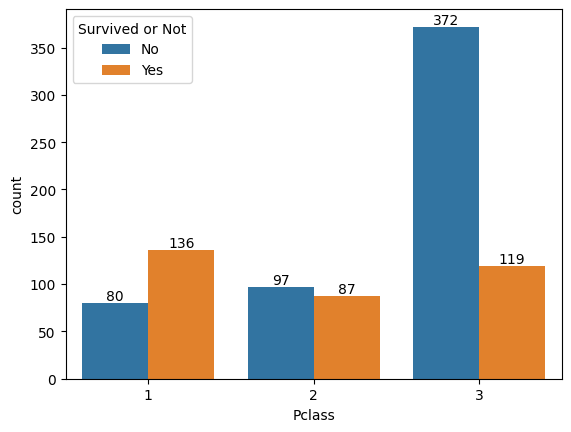

In [1086]:
ax = sns.countplot(data=temp,x='Pclass',hue='Survived');
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
plt.legend(title='Survived or Not', loc='upper left', labels=['No', 'Yes']);

In [1087]:
# Sex
# 查看Sex的值有哪些
temp.Sex.unique()

array(['male', 'female'], dtype=object)

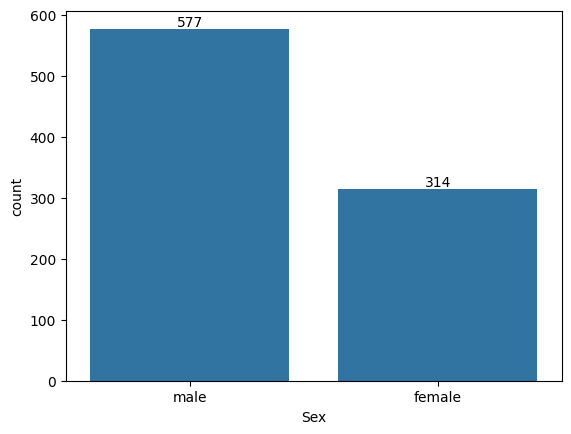

In [1088]:
# 查看性别的分布情况
ax = sns.countplot(data=temp,x='Sex');
ax.bar_label(ax.containers[0]);

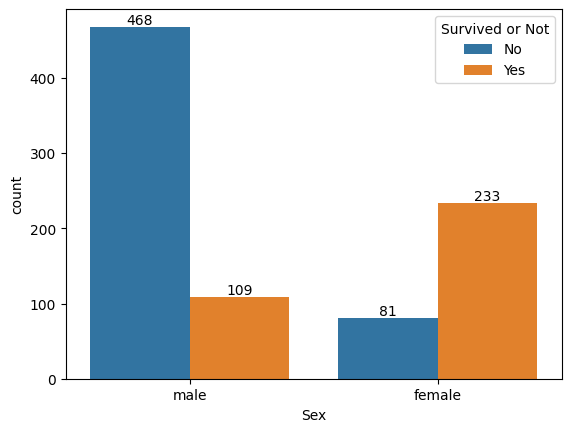

In [1089]:
# 性别与存货的关系
# Sex vs Survived
ax = sns.countplot(data=temp,x='Sex',hue='Survived');
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
plt.legend(title='Survived or Not', loc='upper right', labels=['No', 'Yes']);

In [1090]:
# SibSp : 泰坦尼克号上的兄弟姐妹/配偶的数量
temp.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

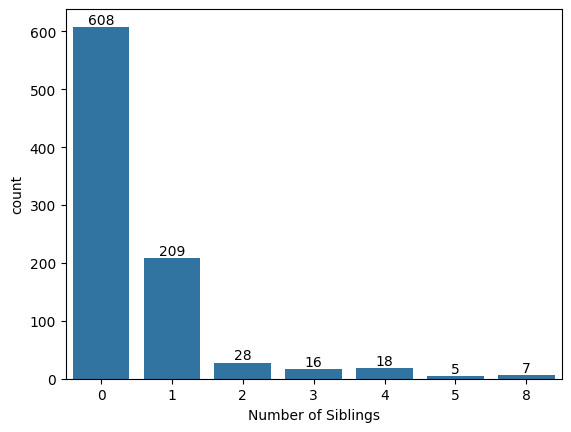

In [1091]:
#  泰坦尼克号上的兄弟姐妹/配偶的数量 分布
ax = sns.countplot(data=temp,x='SibSp');
ax.bar_label(ax.containers[0]);
ax.set_xlabel('Number of Siblings');

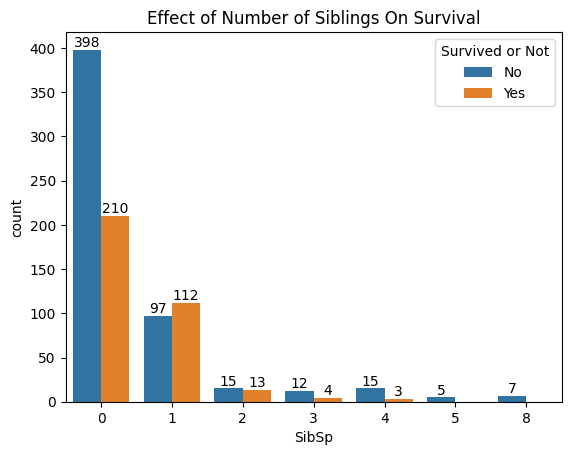

In [1092]:
# Number of Siblings vs Survived
# 兄弟姐妹、配偶数量与是否存货的关系
ax = sns.countplot(data=temp,x='SibSp',hue='Survived');
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
plt.legend(title='Survived or Not', loc='upper right', labels=['No', 'Yes']);
plt.title('Effect of Number of Siblings On Survival')
plt.show();

In [1093]:
# Parch: 泰坦尼克号上的父母/孩子人数

temp.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

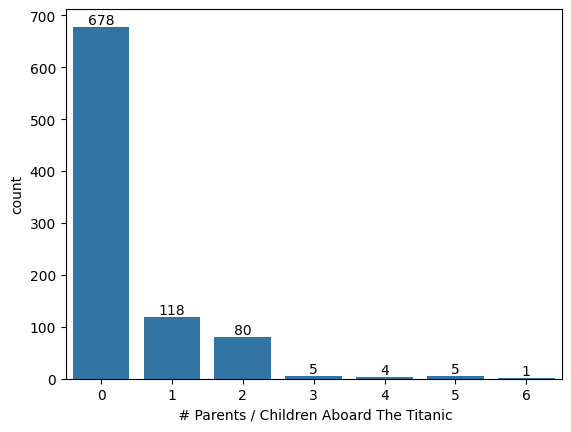

In [1094]:
ax = sns.countplot(data=temp,x='Parch');
ax.bar_label(ax.containers[0]);
ax.set_xlabel(' # Parents / Children Aboard The Titanic');

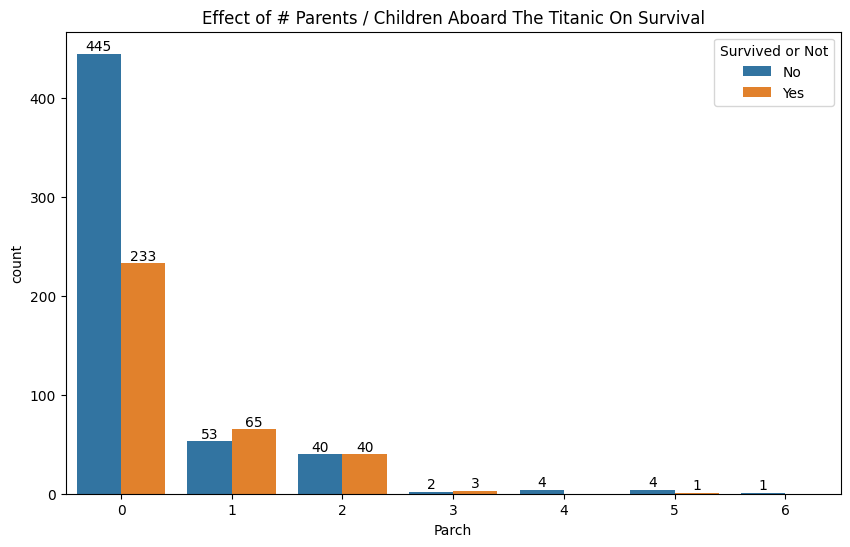

In [1095]:
### Parch vs Survived
plt.figure(figsize=(10,6))
ax = sns.countplot(data=temp,x='Parch',hue='Survived');
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
plt.legend(title='Survived or Not', loc='upper right', labels=['No', 'Yes']);
plt.title('Effect of # Parents / Children Aboard The Titanic On Survival')
plt.show();

In [1096]:
temp['Family Size'] = temp['SibSp']+temp['Parch'] + 1

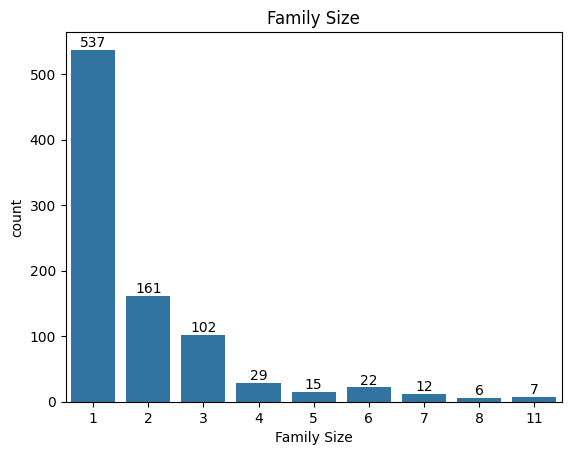

In [1097]:
ax = sns.countplot(data=temp, x='Family Size')
ax.bar_label(ax.containers[0])
ax.set_title('Family Size');

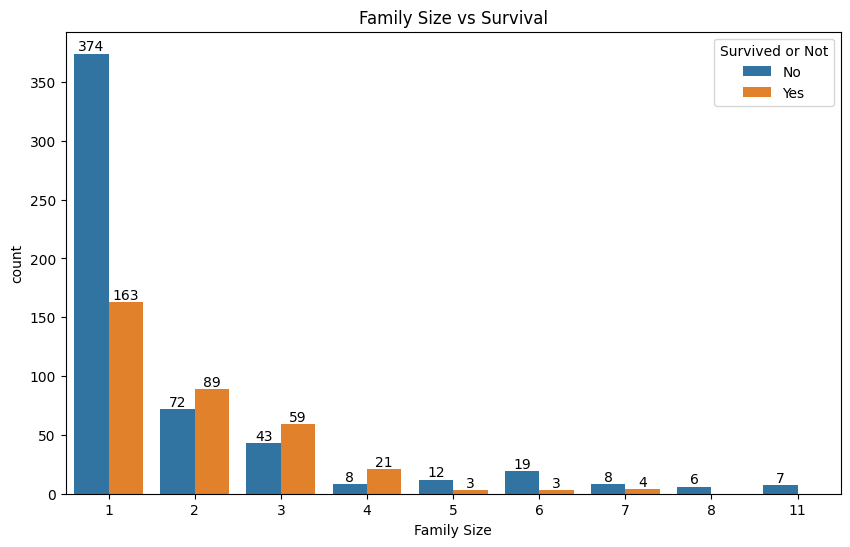

In [1098]:
### Family Size vs Survived
plt.figure(figsize=(10,6))
ax = sns.countplot(data=temp,x='Family Size',hue='Survived');
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
plt.legend(title='Survived or Not', loc='upper right', labels=['No', 'Yes']);
plt.title('Family Size vs Survival')
plt.show();

In [1099]:
# Embarked 登船港口
temp.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

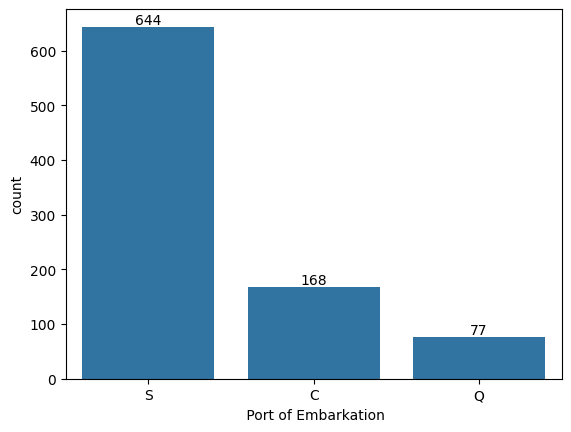

In [1100]:
ax = sns.countplot(data=temp,x='Embarked');
ax.bar_label(ax.containers[0]);
ax.set_xlabel(' Port of Embarkation');

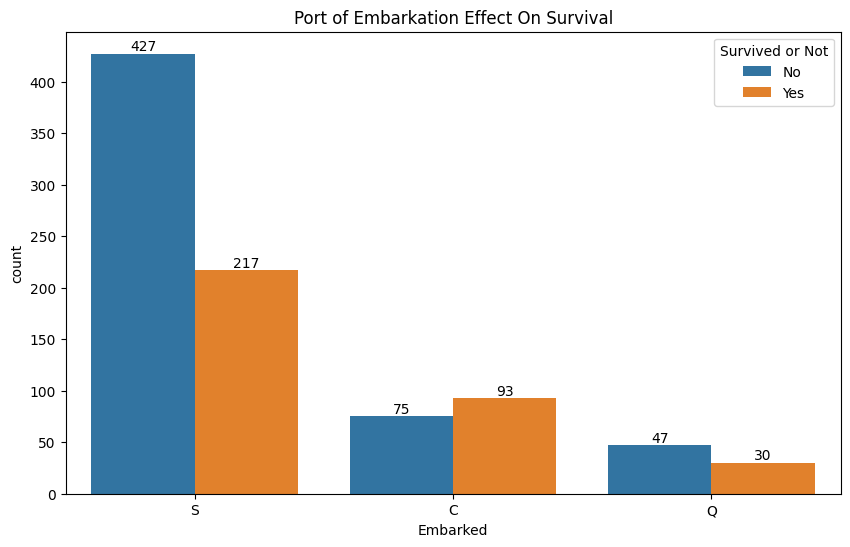

In [1101]:
### Port of Embarkation vs Survived
plt.figure(figsize=(10,6))
ax = sns.countplot(data=temp,x='Embarked',hue='Survived');
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
plt.legend(title='Survived or Not', loc='upper right', labels=['No', 'Yes']);
plt.title('Port of Embarkation Effect On Survival')
plt.show();

In [1102]:
# EDA结论
# EDA Analysis Results
# Based On The Dataset Only 40% People Were Able To Survived The Disaster.
# Mostly Childrens Are Being Rescued.
# People Above Age 20 had a chance of 35% of Being Survived From The Disaster.
# People Paid High Fare and Class Means VIPs Are Given Priority For Rescued.
# Out of Male and Females, Almost 75% Femals Survived The Disaster.
# People Traveling Alone or With A Smaller Family Size Upto 2 children had high chances of survival.
# Family Size Under 5 Had Higher Chance of Survival On Titanic Disaster.
# People Traveling Alone had approx 43% Chances of Survival.
# Family with Size 5+ Had Lesser Chance of Complete Survival On Titanic Disaster.
# 根据数据集，只有 40% 的人能够在灾难中幸存下来。
# 大多数儿童正在获救。
# 20 岁以上的人有 35% 的几率从灾难中幸存下来。
# 人们支付高票价和等级意味着 VIP 优先获救。
# 在男性和女性中，几乎 75% 的女性在灾难中幸存下来。
# 独自旅行或与多达 2 名儿童一起旅行的人有很高的生存机会。
# 5个成员以下的家庭在泰坦尼克号灾难中的生存几率更高。
# 独自旅行的人有大约 43% 的生存机会。
# 5个成员以上的家庭在泰坦尼克号灾难中完全生存的机会较小。

## 数据预处理

In [1243]:
df_labeled = pd.read_csv (r'DataSet\LabeledData.csv')

In [1244]:
def preprocess_data(data):
    # Let's Start By Dropping `PassengerID` `Name` `Ticket` `Cabin` 
    # 删除关联性不大的`PassengerID` `Name` `Ticket` `Cabin`列
    data = data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
    
    return data

In [1245]:
df_labeled = preprocess_data(df_labeled)
df_labeled

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [1246]:
# 统计每列缺失值的数量
missing_values = df_labeled.isnull().sum()

# 输出存在缺失值的列
print("存在缺失值的列：")
# print(missing_values[missing_values > 0])
print(missing_values)

存在缺失值的列：
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [1247]:
# 删除Age为空的行
# 删除 'Age' 列为空的行,重新编排索引，并删除旧的索引列
df_labeled = df_labeled.dropna(subset=['Age']).reset_index(drop=True)

# 打印处理后的 DataFrame
print("\n删除 'age' 列为空的行后的 DataFrame:")

df_labeled


删除 'age' 列为空的行后的 DataFrame:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
709,0,3,female,39.0,0,5,29.1250,Q
710,0,2,male,27.0,0,0,13.0000,S
711,1,1,female,19.0,0,0,30.0000,S
712,1,1,male,26.0,0,0,30.0000,C


In [1248]:
# 找出存在缺失值的行
# missing_rows = df_labeled[df_labeled.isnull().any(axis=1)]
missing_rows = df_labeled[df_labeled['Embarked'].isnull()]
# 输出存在缺失值的行号
print("存在缺失值的行号：")
print(missing_rows.index)

存在缺失值的行号：
Index([46, 662], dtype='int64')


In [1249]:
df_labeled['Embarked'][46]

nan

In [1250]:
# 删除Embarked为空的行
# 删除 'Embarked' 列为空的行,重新编排索引，并删除旧的索引列
df_labeled = df_labeled.dropna(subset=['Embarked']).reset_index(drop=True)

# 打印处理后的 DataFrame
print("\n删除 'Embarked' 列为空的行后的 DataFrame:")

df_labeled


删除 'Embarked' 列为空的行后的 DataFrame:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q
708,0,2,male,27.0,0,0,13.0000,S
709,1,1,female,19.0,0,0,30.0000,S
710,1,1,male,26.0,0,0,30.0000,C


In [1251]:
# from sklearn.impute import SimpleImputer

# # 创建SimpleImputer对象，在本例中使用均值填补缺失值
# # imputer = SimpleImputer(strategy='mean')

# # 创建SimpleImputer对象，在本例中使用众数填补缺失值
# imputer = SimpleImputer(strategy='most_frequent')

# # 使用SimpleImputer对象进行拟合和转换
# data_imputed = imputer.fit_transform(df_labeled)

# # 将填补后的数据转换回DataFrame
# df_labeled = pd.DataFrame(data_imputed, columns=df_labeled.columns)

# df_labeled

In [1252]:
# 统计每列缺失值的数量
missing_values = df_labeled.isnull().sum()

# 输出存在缺失值的列
print("存在缺失值的列：")
# print(missing_values[missing_values > 0])
print(missing_values)

存在缺失值的列：
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [1253]:
df_labeled

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q
708,0,2,male,27.0,0,0,13.0000,S
709,1,1,female,19.0,0,0,30.0000,S
710,1,1,male,26.0,0,0,30.0000,C


In [1254]:
# # 可以写成一个方法： 
# def preprocess_data(data):
#     # 删除关联性不大的`PassengerID` `Name` `Ticket` `Cabin`列
#     data = data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
#     # 删除存在空值的行
#     data.dropna(axis=0, inplace=True)
#     data.reset_index(drop=True)
#     return data

## 特征工程

### 特征编码

In [1255]:
# 找出存在非0和非1的列
# import pandas as pd

# # 创建一个示例 DataFrame
# # data = {
# #     'feature1': [0, 1, 2, 0, 1],
# #     'feature2': [1, 0, 0, 1, 1],
# #     'feature3': [1, 1, 1, 0, 2]
# # }

# # df = pd.DataFrame(data)

# # 使用applymap和lambda函数检查每个元素是否既不是0也不是1
# # 然后使用any(axis=0)来检查每一列是否有满足条件的元素
# non_zero_one_columns = df_labeled_cleaned.map (lambda x: x not in [0, 1]).any(axis=0)

# # 输出列名
# non_zero_one_column_names = non_zero_one_columns[non_zero_one_columns].index.tolist()
# print(non_zero_one_column_names)

In [1256]:
# df_labeled_cleaned

In [1257]:
def feature_engineering(data):

    # data = data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
    # Converting Age Into Four Different Classes 'Children', 'Teenage','Adult', 'old'
    # 根据年龄分为四个不同的类别“儿童”、“青少年”、“成人”、“老年”
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html    
    data['Age'] = pd.cut(data['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
    
    # Converting Fare Into Four Distinct Categories 'Low_fare','median_fare','Average_fare','high_fare'
    # 根据票价转换为四个不同的类别 'Low_fare'、'median_fare'、'Average_fare'、'high_fare'
    data['Fare'] = pd.cut(data['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare','Average_fare','high_fare'])
    
    #  Getting OneHotEncoding For Categorical Columns ['Age','Fare','Sex','Embarked']
    # get_dummies函数进行one-hot编码， 比如Sex分为female和male，那么分为Sex_female和Sex_male，（1，0）表示Female
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
    # data = pd.get_dummies(data, columns = ["Sex","Age","Embarked","Fare"], dtype=int)
    # data = pd.get_dummies(data, columns = ["Pclass","Sex","Age","Embarked","Fare"], dtype=int) 
    data = pd.get_dummies(data, columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype=int) 
    
    return data

In [1258]:
df_labeled = feature_engineering(df_labeled)
df_labeled

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_Children,Age_Teenage,Age_Adult,Age_Elder,...,Parch_4,Parch_5,Parch_6,Fare_Low_fare,Fare_median_fare,Fare_Average_fare,Fare_high_fare,Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0,0,0,1,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
708,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
709,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
710,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


In [1259]:
df_labeled.to_csv('tmp.csv')

In [1260]:
# X： 去除df_labeled的‘Survived’列
# Y： 保留df_labeled的‘Survived’列
X = df_labeled.drop('Survived',axis=1)
y = df_labeled['Survived']
X

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_Children,Age_Teenage,Age_Adult,Age_Elder,SibSp_0,...,Parch_4,Parch_5,Parch_6,Fare_Low_fare,Fare_median_fare,Fare_Average_fare,Fare_high_fare,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,1,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
3,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0,0,1,1,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
708,0,1,0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
709,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
710,1,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0


In [1261]:
y

0      0
1      1
2      1
3      1
4      0
      ..
707    0
708    0
709    1
710    1
711    0
Name: Survived, Length: 712, dtype: int64

### 特征选择

#### 计算DataFrame 中所有列的成对相关性系数观察特征之间的相关性

In [1262]:
X.corr() # Pandas dataframe.corr()用于查找数据帧中所有列的成对相关性。任何na值会自动排除。对于 DataFrame 中的任何非数字数据类型列，将忽略该列。

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_Children,Age_Teenage,Age_Adult,Age_Elder,SibSp_0,...,Parch_4,Parch_5,Parch_6,Fare_Low_fare,Fare_median_fare,Fare_Average_fare,Fare_high_fare,Embarked_C,Embarked_Q,Embarked_S
Pclass_1,1.000000,-0.334442,-0.588670,0.107152,-0.107152,-0.150000,-0.101436,-0.072321,0.287828,-0.069034,...,-0.001447,-0.049644,-0.022139,-0.278685,-0.361267,-0.053537,0.503163,0.335545,-0.086426,-0.271535
Pclass_2,-0.334442,1.000000,-0.564948,0.075347,-0.075347,0.002596,-0.079079,0.070276,-0.017740,-0.034233,...,-0.042584,-0.047644,-0.021247,-0.275288,0.263776,0.183864,-0.137053,-0.140605,-0.080929,0.168577
Pclass_3,-0.588670,-0.564948,1.000000,-0.158446,0.158446,0.129105,0.156642,0.003039,-0.236789,0.089806,...,0.037794,0.084333,0.037608,0.480134,0.090046,-0.110838,-0.322981,-0.173178,0.145087,0.093140
Sex_female,0.107152,0.075347,-0.158446,1.000000,-1.000000,0.068095,0.040275,-0.027443,-0.051679,-0.176132,...,0.021286,0.076257,0.049598,-0.196601,-0.082425,0.103092,0.102052,0.103611,0.027256,-0.109078
Sex_male,-0.107152,-0.075347,0.158446,-1.000000,1.000000,-0.068095,-0.040275,0.027443,0.051679,0.176132,...,-0.021286,-0.076257,-0.049598,0.196601,0.082425,-0.103092,-0.102052,-0.103611,-0.027256,0.109078
Age_Children,-0.150000,0.002596,0.129105,0.068095,-0.068095,1.000000,-0.140029,-0.354444,-0.168523,-0.284876,...,-0.024623,-0.027548,-0.012285,-0.159176,-0.104505,0.187575,0.087840,-0.019642,0.031424,0.003562
Age_Teenage,-0.101436,-0.079079,0.156642,0.040275,-0.040275,-0.140029,1.000000,-0.462516,-0.219906,0.020835,...,-0.032130,-0.035948,-0.016031,0.098745,0.061342,-0.082457,-0.059947,0.009211,0.033471,-0.024220
Age_Adult,-0.072321,0.070276,0.003039,-0.027443,0.027443,-0.354444,-0.462516,1.000000,-0.556631,0.113246,...,-0.005930,0.043980,-0.040578,0.105023,0.078290,-0.081868,-0.109944,-0.022700,-0.030459,0.035353
Age_Elder,0.287828,-0.017740,-0.236789,-0.051679,0.051679,-0.168523,-0.219906,-0.556631,1.000000,0.049899,...,0.053720,-0.001916,0.072900,-0.100661,-0.074432,0.037163,0.124098,0.033916,-0.015269,-0.024390
SibSp_0,-0.069034,-0.034233,0.089806,-0.176132,0.176132,-0.284876,0.020835,0.113246,0.049899,1.000000,...,-0.064791,-0.045885,-0.052101,0.266874,0.307445,-0.234155,-0.342716,-0.043184,0.023716,0.029055


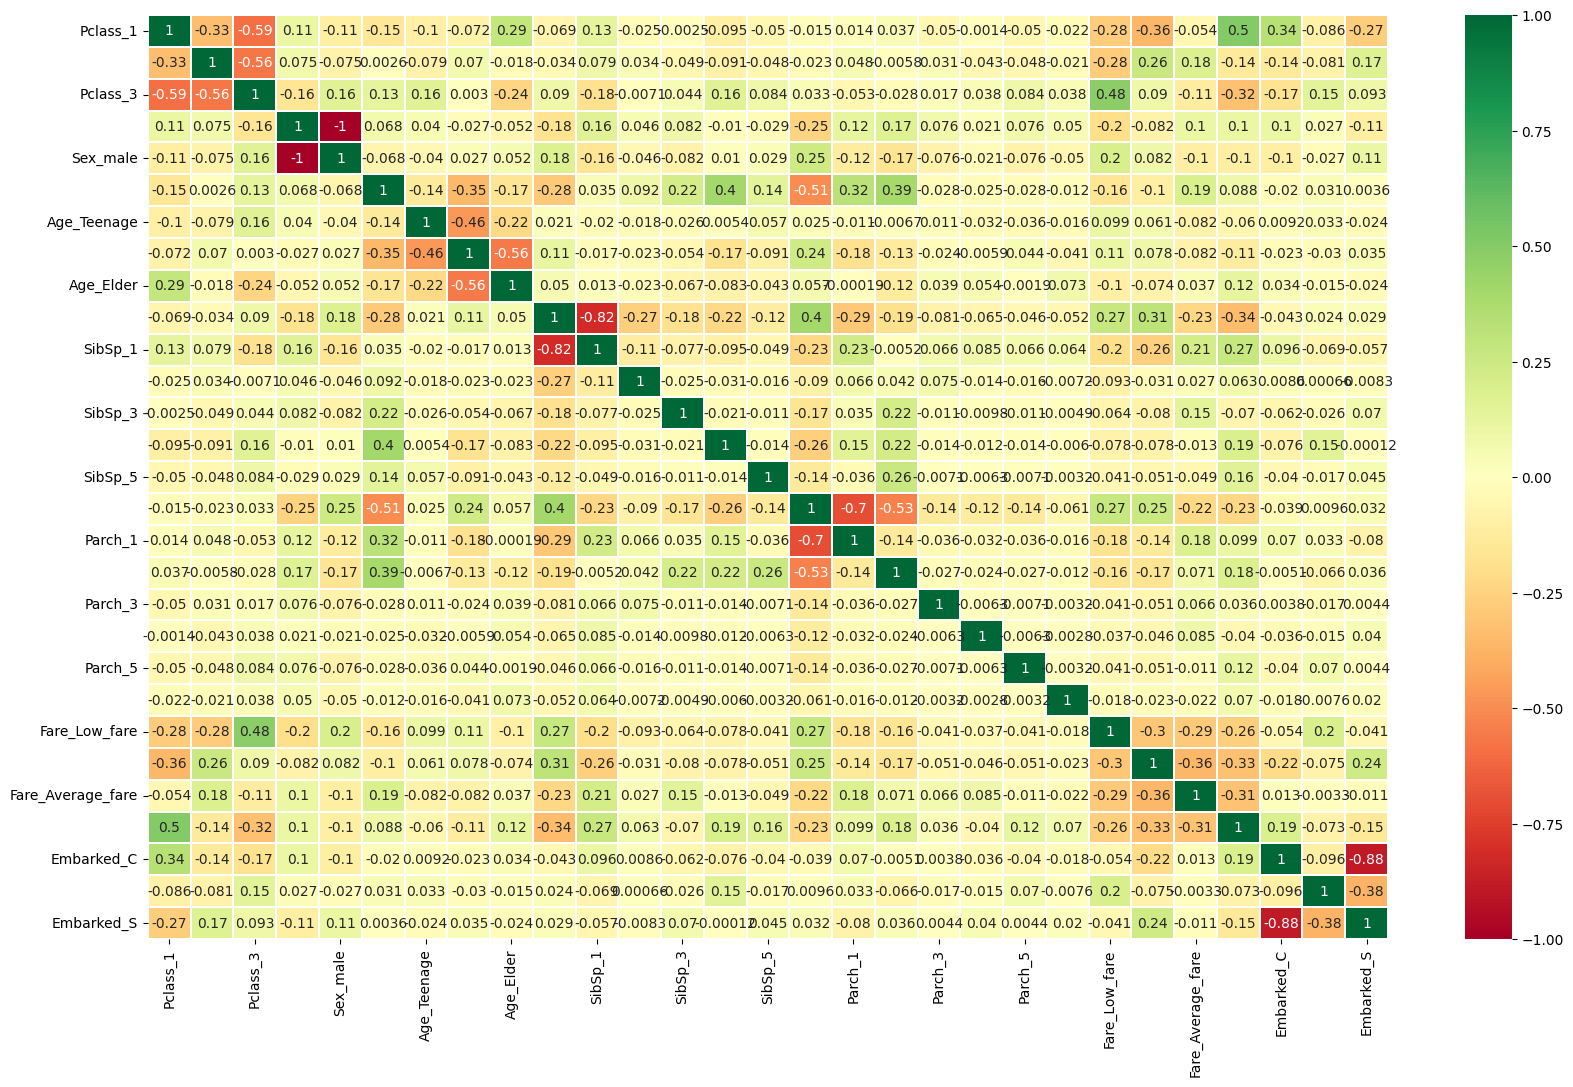

In [1263]:
sns.heatmap(X.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [1264]:
# 在热图结果中：
# 正相关：如果 A 的增加导致特征 B 的增加，那么这两个特征是正相关的。 完全正相关特征的值为 1。
# 负相关：如果 A 的增加导致特征 B 的减少，那么这两个特征是负相关的。 那么完全负相关特征的值为-1。
# 在我们的训练数据中有两个高度或完全相关的特征会导致多重共线性，因此最好将它们删除。

# 在上述热图中，我们可以看到没有高度相关的特征。 在特征 Parch 和 SibSp 之间，相关性的最高值为 0.41。 因此无需删除任何功能。

In [1265]:
# 如果上述方式还不够明显，我们也可以在代码的帮助下通过定义像 0.6 这样的阈值来做到这一点
threshold=0.6
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(X,threshold)
# 如果输出的结果为set(),意味着没有高相关的特征，不需要去删除特征

set()

#### 通过sklearn提供的方法进行特征选择

sklean提供了一些特征选择的方法，比如说VarianceThreshold

In [1266]:
# dataframe转np.array
X = X.values
X

array([[0, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 1, 0]])

In [1267]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np

# 创建示例数据集
# X = np.array([[0, 2, 0, 3],
#               [0, 1, 4, 3],
#               [0, 1, 1, 3],
#               [0, 1, 0, 3]])

# columns = X.columns

# 创建 VarianceThreshold 对象，设置方差阈值为0.1
selector = VarianceThreshold(threshold=0.1)

# dataframe转np.array

# X = X.values

# 进行特征选择
X_selected = selector.fit_transform(X)

# 将选择后的特征矩阵转换为 DataFrame
# X_selected_df = pd.DataFrame(X_selected, columns=columns[selector.get_support()])

# 设置 Pandas 显示选项，确保所有列都会显示
# pd.set_option('display.max_columns', None)

X = X_selected
# 查看选择后的特征矩阵
print(X)

[[0 0 1 ... 0 0 1]
 [1 0 0 ... 1 1 0]
 [0 0 1 ... 0 0 1]
 ...
 [1 0 0 ... 0 0 1]
 [1 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 0]]


# Model Training - 1

In [1268]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

"""
test_size:test样本的占比
random_state: 可以为整数、RandomState实例或None，默认为None
①若为None时，每次生成的数据都是随机，可能不一样
②若为整数时，每次生成的数据都相同
"""

'\ntest_size:test样本的占比\nrandom_state: 可以为整数、RandomState实例或None，默认为None\n①若为None时，每次生成的数据都是随机，可能不一样\n②若为整数时，每次生成的数据都相同\n'

In [1269]:
X_train

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 1]])

In [1270]:
y_train

43     1
42     0
73     0
167    0
449    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Survived, Length: 498, dtype: int64

In [1271]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict ## Cross Validation

### 朴素贝叶斯Naive Bayes

--------GaussianNB Naive Bayes -------
The accuracy Gaussian Naive Bayes Classifier is 70.09
[[85 37]
 [27 65]]


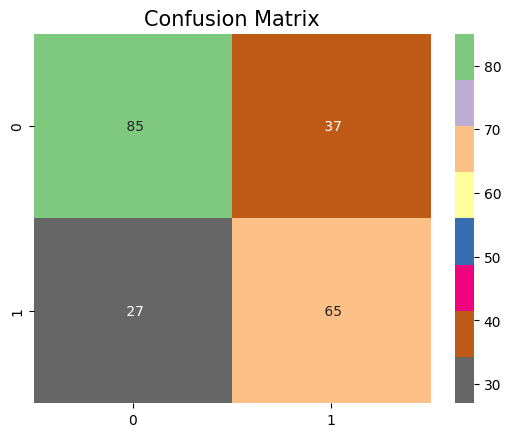

In [1272]:
#################################### Naive Bayes ########################
# 调用朴素贝叶斯算法进行预测
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)
prediction_gnb=model.predict(X_test)

print('--------GaussianNB Naive Bayes -------')
print('The accuracy Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_gnb,y_test)*100,2)) # metrics.accuracy_score进行准确率衡量

# y_pred = cross_val_predict(model,X,y,cv=10)  

# prediction_gnb=model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,prediction_gnb),annot=True,fmt='3.0f',cmap="Accent_r") # heatmap显示混淆矩阵
print(confusion_matrix(y_test,prediction_gnb))

plt.title('Confusion Matrix', y=1, size=15);


In [ ]:
#################################### Naive Bayes ########################
# 调用朴素贝叶斯算法进行预测
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)
prediction_gnb=model.predict(X_test)

print('--------GaussianNB Naive Bayes -------')
print('The accuracy Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_gnb,y_test)*100,2)) # metrics.accuracy_score进行准确率衡量

sns.heatmap(confusion_matrix(y_test,prediction_gnb),annot=True,fmt='3.0f',cmap="Accent_r") # heatmap显示混淆矩阵
print(confusion_matrix(y_test,prediction_gnb))
plt.title('Confusion Matrix', y=1, size=15);

The cross validated score for Gaussian Naive Bayes classifier is: 74.89
[[314 110]
 [ 69 219]]


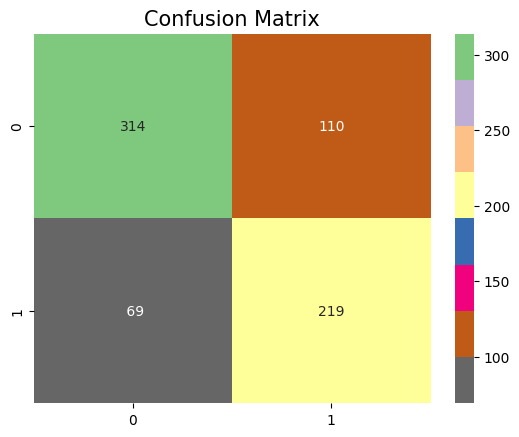

In [1273]:
# K折交叉验证,得到更准缺的结果
kfold = KFold(n_splits=10,shuffle=True,random_state=42) # split the data into 10 equal parts，这不是只是帮助理解K折交叉验证的原理，可删除
# for train, test in kfold.split(X):
#     print(train,test)
#     print("--------")
#     print(np.array(X)[train], np.array(X)[test])
#     print("*"*50)

result_gnb=cross_val_score(model,X,y,cv=10,scoring='accuracy')  # cv=10 表示10折

print('The cross validated score for Gaussian Naive Bayes classifier is:',round(result_gnb.mean()*100,2))

y_pred = cross_val_predict(model,X,y,cv=10)  

sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="Accent_r") # heatmap显示混淆矩阵
print(confusion_matrix(y,y_pred))

plt.title('Confusion Matrix', y=1, size=15);

### 支持向量机SVM

--------SVM -------
The accuracy SVM is 76.64
The cross validated score for SVM is: 80.34


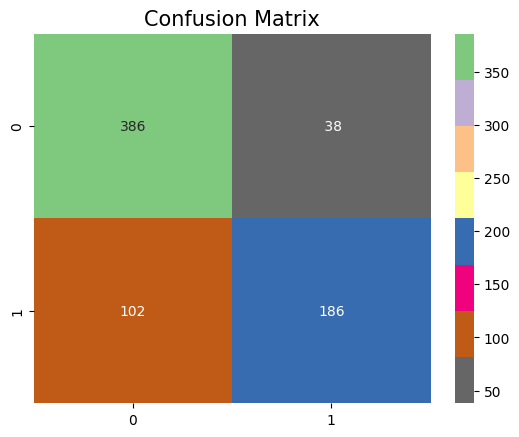

In [1274]:
#################################### SVM ########################
from sklearn.svm import SVC, LinearSVC
model = SVC()
model.fit(X_train,y_train)
prediction_svm=model.predict(X_test)

print('--------SVM -------')
print('The accuracy SVM is',round(accuracy_score(prediction_svm,y_test)*100,2))

# kfold = KFold(n_splits=10,shuffle=True,random_state=42) # split the data into 10 equal parts

# result_svm=cross_val_score(model,X,y,cv=10,scoring='accuracy') 

print('The cross validated score for SVM is:',round(result_svm.mean()*100,2))

y_pred = cross_val_predict(model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="Accent_r")
plt.title('Confusion Matrix', y=1, size=15);

### 神经网络KNN

--------KNN -------
The accuracy KNN Classifier is 73.83
The cross validated score for KNN classifier is: 78.38


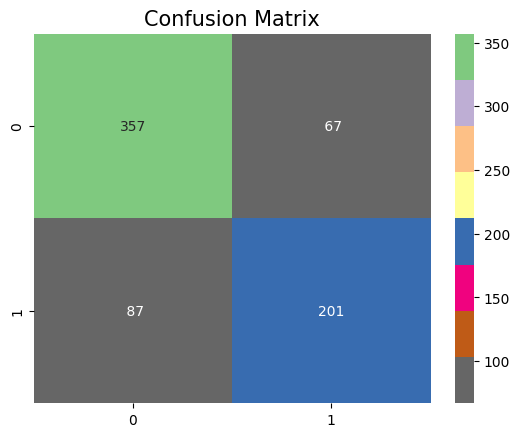

In [1275]:
#################################### KNN ########################
from sklearn.neighbors import KNeighborsClassifier
model =  KNeighborsClassifier()
model.fit(X_train,y_train)
prediction_knn=model.predict(X_test)

print('--------KNN -------')
print('The accuracy KNN Classifier is',round(accuracy_score(prediction_knn,y_test)*100,2))

kfold = KFold(n_splits=10,shuffle=True, random_state=42) # split the data into 8 equal parts

result_knn=cross_val_score(model,X,y,cv=10,scoring='accuracy')

print('The cross validated score for KNN classifier is:',round(result_knn.mean()*100,2))

y_pred = cross_val_predict(model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="Accent_r")
plt.title('Confusion Matrix', y=1, size=15);

### 逻辑回归Logistic Regression

--------Logistic Regression -------
The accuracy Logistic Regression is 78.5
The cross validated score for Logistic Regression is: 79.09


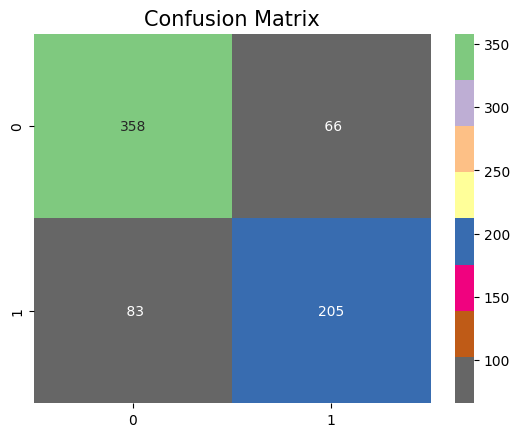

In [1280]:
#################################### Logistic Regression ########################
from sklearn.linear_model import LogisticRegression
model =  LogisticRegression(penalty='l2', C=1.0, solver='lbfgs')
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)

print('--------Logistic Regression -------')
print('The accuracy Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))

# kfold = KFold(n_splits=10,shuffle=True, random_state=42) # split the data into 10 equal parts

result_lr=cross_val_score(model,X,y,cv=10,scoring='accuracy')

print('The cross validated score for Logistic Regression is:',round(result_lr.mean()*100,2))

y_pred = cross_val_predict(model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="Accent_r")
plt.title('Confusion Matrix', y=1, size=15);

### 随机森林 Random Forest

--------Random Forest Classifier -------
The accuracy Random Forest Classifier  is 77.1
The cross validated score for Random Forest Classifier is: 80.34


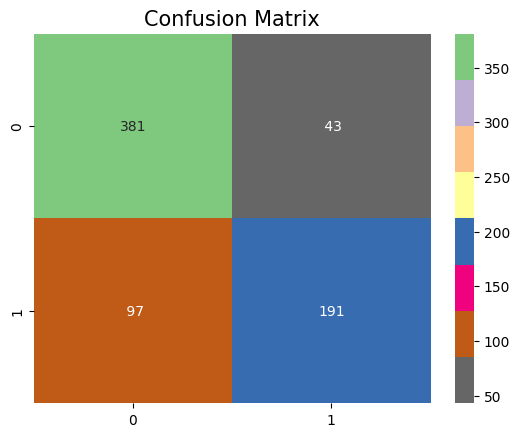

In [1137]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=800,
                             min_samples_split=12,
                             # max_features='auto',
                            max_features='sqrt',
                             oob_score=True,
                             random_state=1,n_jobs=-1)

model.fit(X_train,y_train)
prediction_rf=model.predict(X_test)

print('--------Random Forest Classifier -------')
print('The accuracy Random Forest Classifier  is',round(accuracy_score(prediction_rf,y_test)*100,2))

kfold = KFold(n_splits=10,shuffle=True, random_state=42) # split the data into 10 equal parts

result_rf=cross_val_score(model,X,y,cv=10,scoring='accuracy')

print('The cross validated score for Random Forest Classifier is:',round(result_rf.mean()*100,2))

y_pred = cross_val_predict(model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="Accent_r")
plt.title('Confusion Matrix', y=1, size=15);

### Gradient Boost

### ADA Boost

--------ADA Boost -------
The accuracy ADA Boost Classifier is 79.02
The cross validated score for ADA Boost classifier is: 78.81


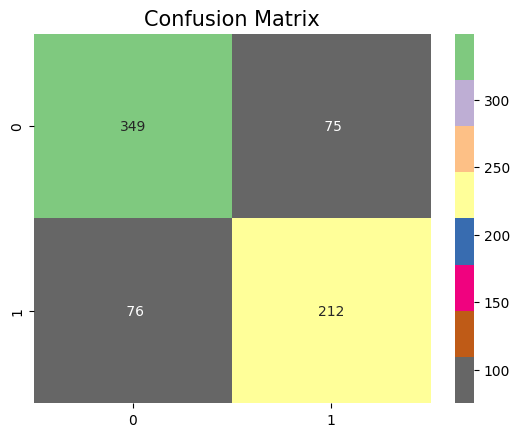

In [1235]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()

model.fit(X_train,y_train)
prediction_ada=model.predict(X_test)

print('--------ADA Boost -------')
print('The accuracy ADA Boost Classifier is',round(accuracy_score(prediction_ada,y_test)*100,2))

kfold = KFold(n_splits=10,shuffle=True, random_state=42) # split the data into 10 equal parts

result_ada=cross_val_score(model,X,y,cv=10,scoring='accuracy')

print('The cross validated score for ADA Boost classifier is:',round(result_ada.mean()*100,2))

y_pred = cross_val_predict(model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="Accent_r")
plt.title('Confusion Matrix', y=1, size=15);

### 以上几种算法模型的评估对比

In [1236]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'AdaBoostClassifier'],
    'Score': [result_svm.mean(), result_knn.mean(), result_lr.mean(), 
              result_rf.mean(), result_gnb.mean(), result_ada.mean()]})
models.sort_values(by='Score',ascending=False)

,Model,Score
0,Support Vector Machines,0.803443
3,Random Forest,0.803443
2,Logistic Regression,0.793701
5,AdaBoostClassifier,0.788087
1,KNN,0.783764
4,Naive Bayes,0.748865


## 选择准确率最高的Random Forest算法，进行超参数调优

In [1158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

n_estim=range(100,1000,100)
max_depth = range(5,15,2)

param_grid = {"n_estimators" :n_estim,"max_depth":max_depth}
model = RandomForestClassifier()
model_rf = GridSearchCV(model,param_grid = param_grid, cv=10, scoring="accuracy", n_jobs= 4, verbose = 1)

model_rf.fit(X_train,y_train)

print(model_rf.best_score_)

#best estimator
print(model_rf.best_estimator_)

0.7954285714285715
RandomForestClassifier(max_depth=11, n_estimators=400)


In [1160]:
### Applying Param Got From GridSearchCV
rfmodel = RandomForestClassifier(max_depth=11, n_estimators=300)

rfmodel.fit(X_train,y_train)

RandomForestClassifier(max_depth=11, n_estimators=300)

## 使用Random Forest算法调优后的模型进行预测

In [1161]:
# 读取需要预测的数据 UnLabeledData.csv
df_unLabeled_data = pd.read_csv(r'DataSet\UnlabeledData.csv')

In [1162]:
def preprocess_data(data):
    # 删除关联性不大的`PassengerID` `Name` `Ticket` `Cabin`列
    data = data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
    return data

In [1163]:
# 读取需要预测的数据 UnLabeledData.csv
df_unLabeled = preprocess_data(df_unLabeled_data)

In [1164]:
df_unLabeled = feature_engineering(df_unLabeled)
df_unLabeled

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_Children,Age_Teenage,Age_Adult,Age_Elder,SibSp_0,...,Parch_4,Parch_5,Parch_6,Fare_Low_fare,Fare_median_fare,Fare_Average_fare,Fare_high_fare,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
410,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,1,0,0
411,0,0,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
412,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [1165]:
# # dataframe转np.array
# df_unLabeled = df_unLabeled.values
# df_unLabeled

In [1166]:
y_pred = best_model.predict(df_unLabeled)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [1167]:
submission = pd.DataFrame({
        "PassengerId": df_unLabeled_data["PassengerId"],
        "Survived": y_pred})

In [1168]:
submission.to_csv('Submission.csv', index=False)

# Model Training - 2

### 网格搜索法GridSearchCV

**LogisticRegression算法**

class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

这是Scikit-learn中LogisticRegression类的构造函数参数列表及其默认值：

| 参数              | 说明                                                         |
| ----------------- | ------------------------------------------------------------ |
| penalty           | 正则化类型，默认为'l2'，可选值为{'l1', 'l2', 'elasticnet', 'none'}。 |
| dual              | 对偶形式，默认为False。对于n_samples > n_features的情况，通常选择False。 |
| tol               | 收敛判据，默认为0.0001。如果迭代过程中损失函数的变化小于该值，则认为优化已经收敛。 |
| C                 | 正则化强度的倒数，默认为1.0。较小的值表示更强的正则化。      |
| fit_intercept     | 是否拟合截距，默认为True。如果为True，则会为模型添加一个截距项。 |
| intercept_scaling | 截距项的缩放因子，默认为1。                                  |
| class_weight      | 类别权重，默认为None。可以用于处理类别不平衡的问题。         |
| random_state      | 随机数种子，默认为None。                                     |
| solver            | 优化算法，默认为'lbfgs'。其他可选值有{'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}。 |
| max_iter          | 最大迭代次数，默认为100。当优化算法没有收敛时，控制最大迭代次数。 |
| multi_class       | 多类别分类策略，默认为'auto'。可选值为{'auto', 'ovr', 'multinomial'}。 |
| verbose           | 详细程度，默认为0。如果大于0，会输出优化过程的信息。         |
| warm_start        | 是否热启动，默认为False。如果设置为True，则重用上一次调用的解决方案以适合初始化；否则，将擦除先前的解决方案。 |
| n_jobs            | 并行工作数，默认为None。如果设置为-1，则使用所有可用的CPU。  |
| l1_ratio          | Elastic-Net混合参数，默认为None。当penalty='elasticnet'时使用，指定L1和L2正则化的混合比例。 |

**GridSearchCV**

class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

GridSearchCV是Scikit-learn中用于超参数搜索的一种方法，它允许你指定一个参数网格，并在指定的参数空间内进行穷举搜索。

| 参数               | 说明                                                         |
| ------------------ | ------------------------------------------------------------ |
| estimator          | 你想要优化的模型对象。通常是一个Scikit-learn中的机器学习算法，比如LogisticRegression、RandomForestClassifier等。 |
| param_grid         | 一个字典或字典列表，指定了要搜索的参数网格。字典的键是模型参数的名称，值是要搜索的参数值的列表。 |
| scoring            | 模型评估指标。用于评估模型性能的指标，默认为None，即使用模型的score方法来评估性能。 |
| n_jobs             | 并行工作数。指定在搜索过程中并行运行的作业数量。默认为None，表示不并行运行。 |
| refit              | 是否在找到最佳参数后使用整个数据集重新拟合模型。默认为True。 |
| cv                 | 交叉验证生成器或迭代器。用于确定交叉验证的折数和分割策略。   |
| verbose            | 详细程度。控制输出信息的详细程度。默认为0，表示不输出额外信息。 |
| pre_dispatch       | 预调度。用于控制在并行运行时发送的作业数量。默认为'2*n_jobs'，表示发送两倍于可用CPU核心数量的作业。 |
| error_score        | 错误得分。当一个参数设置导致错误时，用于替代该参数设置的得分。默认为NaN，表示忽略错误。 |
| return_train_score | 是否返回训练集的得分。默认为False，表示不返回训练集的得分。  |

#### 加载数据集

In [1289]:
df_Labeled = pd.read_csv(r'DataSet\LabeledData.csv')

#### 数据预处理

In [1290]:
# 在数据预处理阶段，根据EDA的分析结果，删除冗余列
# 在数据预处理阶段，对数据缺失值进行处理
def preprocess_data(data):
    # 删除关联性不大的`PassengerID` `Name` `Ticket` `Cabin`列
    data = data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

    # 删除存在空值的行
    data.dropna(axis=0, inplace=True)

    data.reset_index(drop=True)
    return data

In [1291]:
df_Labeled = preprocess_data(df_Labeled)

df_Labeled

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [1292]:
# X： 去除df_labeled的‘Survived’列
X = df_Labeled.drop('Survived',axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
889,1,male,26.0,0,0,30.0000,C


In [1293]:
# Y： 保留df_labeled的‘Survived’列
y = df_Labeled['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [1294]:
def feature_engineering(data):

    # data = data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
    # Converting Age Into Four Different Classes 'Children', 'Teenage','Adult', 'old'
    # 根据年龄分为四个不同的类别“儿童”、“青少年”、“成人”、“老年”
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html    
    data['Age'] = pd.cut(data['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
    
    # Converting Fare Into Four Distinct Categories 'Low_fare','median_fare','Average_fare','high_fare'
    # 根据票价转换为四个不同的类别 'Low_fare'、'median_fare'、'Average_fare'、'high_fare'
    data['Fare'] = pd.cut(data['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare','Average_fare','high_fare'])
    
    #  Getting OneHotEncoding For Categorical Columns ['Age','Fare','Sex','Embarked']
    # get_dummies函数进行one-hot编码， 比如Sex分为female和male，那么分为Sex_female和Sex_male，（1，0）表示Female
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
    # data = pd.get_dummies(data, columns = ["Sex","Age","Embarked","Fare"], dtype=int)
    # data = pd.get_dummies(data, columns = ["Pclass","Sex","Age","Embarked","Fare"], dtype=int) 
    data = pd.get_dummies(data, columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype=int) 
    
    return data

In [1295]:
X = feature_engineering(X)
X

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_Children,Age_Teenage,Age_Adult,Age_Elder,SibSp_0,...,Parch_4,Parch_5,Parch_6,Fare_Low_fare,Fare_median_fare,Fare_Average_fare,Fare_high_fare,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,1,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
3,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,0,1,1,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
886,0,1,0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
887,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
889,1,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0


#### 模型训练

In [1296]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

--------Logistic Regression -------
The accuracy Logistic Regression is 75.52


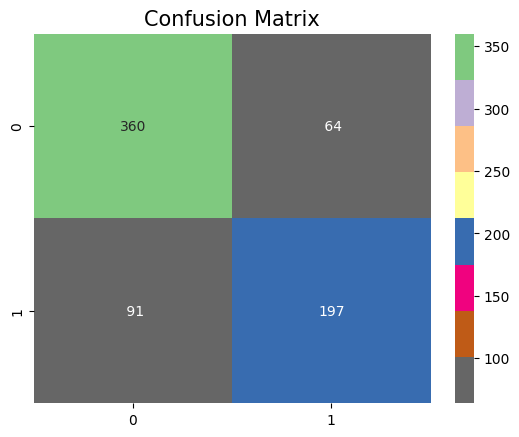

In [1309]:
#################################### Logistic Regression ########################
from sklearn.linear_model import LogisticRegression
model =  LogisticRegression(penalty='l2', C=0.1, solver='lbfgs')
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)

print('--------Logistic Regression -------')
print('The accuracy Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))

y_pred = cross_val_predict(model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="Accent_r")
plt.title('Confusion Matrix', y=1, size=15);

最佳超参数组合: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Test Set准确率: 0.7902097902097902
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82        80
           1       0.81      0.68      0.74        63

    accuracy                           0.79       143
   macro avg       0.79      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



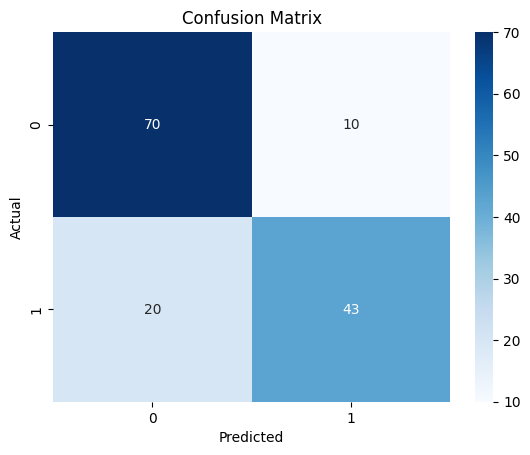

In [1310]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# 定义逻辑回归模型
# model = LogisticRegression(solver='liblinear')  # 设置solver
model = LogisticRegression()  # 设置solver
# 定义超参数网格
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 150],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

# 使用网格搜索法进行超参数寻优
grid_search = GridSearchCV(model, param_grid)

# 在Train Set上训练模型
grid_search.fit(X_train, y_train)

# 获取最佳模型
best_model = grid_search.best_estimator_

# 在Test Set上进行预测
y_pred = best_model.predict(X_test)

# 输出最佳超参数组合和对应的得分
print("最佳超参数组合:", grid_search.best_params_)
print("Test Set准确率:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 绘制混淆矩阵的热图
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [1313]:
model = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs')
result_lr=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Logistic Regression is:',round(result_lr.mean()*100,2))

The cross validated score for Logistic Regression is: 78.25


In [1314]:
model = LogisticRegression(penalty= 'l2', C= 10, solver= 'lbfgs')
result_lr=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Logistic Regression is:',round(result_lr.mean()*100,2))

The cross validated score for Logistic Regression is: 78.95


#### 模型应用

In [1179]:
# 读取需要预测的数据 UnLabeledData.csv
df_unLabeled_data = pd.read_csv(r'DataSet\UnlabeledData.csv')

In [1180]:
def preprocess_data(data):
    # 删除关联性不大的`PassengerID` `Name` `Ticket` `Cabin`列
    data = data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
    return data

In [1181]:
# 读取需要预测的数据 UnLabeledData.csv
df_unLabeled = preprocess_data(df_unLabeled_data)

In [1182]:
df_unLabeled = feature_engineering(df_unLabeled)
df_unLabeled

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_Children,Age_Teenage,Age_Adult,Age_Elder,SibSp_0,...,Parch_4,Parch_5,Parch_6,Fare_Low_fare,Fare_median_fare,Fare_Average_fare,Fare_high_fare,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
410,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,1,0,0
411,0,0,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
412,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [1183]:
# # dataframe转np.array
# df_unLabeled = df_unLabeled.values
# df_unLabeled

In [1184]:
y_pred = best_model.predict(df_unLabeled)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
submission = pd.DataFrame({
        "PassengerId": df_unLabeled_data["PassengerId"],
        "Survived": y_pred})

In [ ]:
submission.to_csv('Submission.csv', index=False)

### 随机网格搜索RamdomizedSeaarchCV

### 附

In [1315]:
import pandas as pd

# 示例数据
data1 = {'A': [1, 2, 3, 4],
         'B': ['a', 'b', 'c', 'd']}
data2 = {'A': [1, 2, 5, 4],
         'B': ['a', 'b', 'c', 'e']}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# 比较两个 DataFrame 的不同
df_diff = df1.compare(df2)

# 打印不同之处
print("不同之处:")
print(df_diff)


不同之处:
     A          B      
  self other self other
2  3.0   5.0  NaN   NaN
3  NaN   NaN    d     e


In [1317]:
import pandas as pd

# 示例数据
data1 = {'A': [1, 2, 3, 4],
         'B': ['a', 'b', 'c', 'd']}
data2 = {'A': [1, 2, 5, 4],
         'C': ['a', 'b', 'c', 'e']}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# 比较列名并输出不同的列
different_columns = df1.columns.difference(df2.columns)
print("不同的列:", different_columns)


不同的列: Index(['B'], dtype='object')
